In [1]:
ls

 Volume in drive E is New Volume
 Volume Serial Number is CA76-314D

 Directory of E:\DEV\Panda

03/01/2019  10:02 PM    <DIR>          .
03/01/2019  10:02 PM    <DIR>          ..
03/01/2019  10:02 PM    <DIR>          .ipynb_checkpoints
01/06/2017  07:00 PM             9,828 study DataFrame.ipynb
01/06/2017  06:42 PM            13,483 study numpy.ipynb
01/05/2017  01:04 PM            39,974 study pandas by pryn 60.01.03.ipynb
01/04/2017  01:09 PM             4,326 study pandas by pryn 60.01.03-Copy1.ipynb
01/06/2017  05:57 PM             2,639 study pandas datetime.ipynb
01/05/2017  01:25 PM            65,204 Study Seaborn pryn.ipynb
               6 File(s)        135,454 bytes
               3 Dir(s)  433,008,078,848 bytes free


In [131]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt


In [132]:
data=pd.read_json("study.json",orient="record")

In [133]:
data

,log
0,"{'eat': [23, 43, 44], 'study': [45, 90, 234], ..."
1,"{'eat': [33, 55, 66], 'study': [90, 234], 'ent..."
2,"{'eat': [99], 'study': [90, 234], 'entertain':..."
3,"{'eat': [29], 'entertain': [950], 'date': '201..."
4,"{'eat': [69], 'entertain': [150], 'date': '201..."
5,"{'eat': [123], 'study': [90, 234], 'entertain'..."
6,"{'eat': [123, 456], 'study': [123, 90, 234], '..."


In [134]:
data["log"]

0    {'eat': [23, 43, 44], 'study': [45, 90, 234], ...
1    {'eat': [33, 55, 66], 'study': [90, 234], 'ent...
2    {'eat': [99], 'study': [90, 234], 'entertain':...
3    {'eat': [29], 'entertain': [950], 'date': '201...
4    {'eat': [69], 'entertain': [150], 'date': '201...
5    {'eat': [123], 'study': [90, 234], 'entertain'...
6    {'eat': [123, 456], 'study': [123, 90, 234], '...
Name: log, dtype: object

In [135]:
de=pd.read_json(data["log"].to_json(),orient="index")

In [136]:
de

,date,eat,entertain,study
0.0,2017-01-01,"[23, 43, 44]",[450],"[45, 90, 234]"
1.0,2017-01-02,"[33, 55, 66]",[450],"[90, 234]"
2.0,2017-01-03,[99],[450],"[90, 234]"
3.0,2017-02-01,[29],[950],NaN
4.0,2017-02-02,[69],[150],NaN
5.0,2017-03-02,[123],[350],"[90, 234]"
6.0,2017-05-02,"[123, 456]",NaN,"[123, 90, 234]"


In [137]:
de['study'].fillna("[0]")

0.0     [45, 90, 234]
1.0         [90, 234]
2.0         [90, 234]
3.0               [0]
4.0               [0]
5.0         [90, 234]
6.0    [123, 90, 234]
Name: study, dtype: object

In [138]:
sum(de.loc[1]['eat'])

154

In [139]:
max(de.loc[1]['eat'])

66

In [140]:
np.mean(de.loc[1]['eat'])

51.333333333333336

In [141]:
sum(de.loc[1]['study'])

324

In [142]:
print(de['study'])

0.0     [45, 90, 234]
1.0         [90, 234]
2.0         [90, 234]
3.0               NaN
4.0               NaN
5.0         [90, 234]
6.0    [123, 90, 234]
Name: study, dtype: object


In [143]:
def sumColumn(data):
    total=0
    for dd in data:
        if not np.isnan(dd).any():
            total+=sum(dd)
            #print (sum(dd))
        
    return total


In [144]:
totalStudyCost=sumColumn(de['study'])
print("{} {} {}".format('Total Study Cost', totalStudyCost,'Baht'))

Total Study Cost 1788 Baht


In [145]:
de.loc[range(0,3)]

,date,eat,entertain,study
0,2017-01-01,"[23, 43, 44]",[450],"[45, 90, 234]"
1,2017-01-02,"[33, 55, 66]",[450],"[90, 234]"
2,2017-01-03,[99],[450],"[90, 234]"


In [146]:
de.loc[[1,3]]

,date,eat,entertain,study
1,2017-01-02,"[33, 55, 66]",[450],"[90, 234]"
3,2017-02-01,[29],[950],NaN


In [147]:
de['date']

0.0   2017-01-01
1.0   2017-01-02
2.0   2017-01-03
3.0   2017-02-01
4.0   2017-02-02
5.0   2017-03-02
6.0   2017-05-02
Name: date, dtype: datetime64[ns]

In [148]:
type(de['date'])

pandas.core.series.Series

In [149]:
de.index=de['date']

In [150]:
de.index.month

array([1, 1, 1, 2, 2, 3, 5])

In [151]:
cost=pd.groupby(de,by=[de.index.month])

In [152]:
len(cost.sum())

4

In [153]:
cst=cost.sum()

In [154]:
for gc in cst:
    print(gc)
    print(type(gc))

eat
<class 'str'>
entertain
<class 'str'>
study
<class 'str'>


In [155]:
cost.sum()

,eat,entertain,study
1,"[23, 43, 44, 33, 55, 66, 99]","[450, 450, 450]","[45, 90, 234, 90, 234, 90, 234]"
2,"[29, 69]","[950, 150]",NaN
3,[123],[350],"[90, 234]"
5,"[123, 456]",NaN,"[123, 90, 234]"


In [156]:
cst.loc[1]

eat             [23, 43, 44, 33, 55, 66, 99]
entertain                    [450, 450, 450]
study        [45, 90, 234, 90, 234, 90, 234]
Name: 1, dtype: object

In [157]:
print(type(cst.loc[1]))
totalStudyCost=sumColumn(cst.loc[1])
print("{} {} {}".format('Total Eat in Month1', totalStudyCost,'Baht'))

<class 'pandas.core.series.Series'>
Total Eat in Month1 2730 Baht


In [158]:
totalStudyCost=sumColumn(cst.loc[2])
print("{} {} {}".format('Total Eat in Month2', totalStudyCost,'Baht'))

Total Eat in Month2 1198 Baht


In [159]:
g = de.groupby(pd.TimeGrouper("M"))

In [160]:
g.sum()

,eat,entertain,study
date,,,
2017-01-31,"[23, 43, 44, 33, 55, 66, 99]","[450, 450, 450]","[45, 90, 234, 90, 234, 90, 234]"
2017-02-28,"[29, 69]","[950, 150]",NaN
2017-03-31,[123],[350],"[90, 234]"
2017-04-30,0,0,0
2017-05-31,"[123, 456]",NaN,"[123, 90, 234]"


In [161]:
GB=de.groupby([(de.index.month)]).sum()

In [162]:
GB

,eat,entertain,study
1,"[23, 43, 44, 33, 55, 66, 99]","[450, 450, 450]","[45, 90, 234, 90, 234, 90, 234]"
2,"[29, 69]","[950, 150]",NaN
3,[123],[350],"[90, 234]"
5,"[123, 456]",NaN,"[123, 90, 234]"


In [163]:
len(GB)

4

In [164]:
GB.count()

eat          4
entertain    3
study        3
dtype: int64

In [165]:
def monthName(nam):
    mnt={1:"January",
            2:"Febuary",
            3:"March",
            4:"April",
            5:"May"}
    return mnt[nam]

In [177]:
monthName(5)

'May'

In [167]:
sumeat=[]
for gd in GB['eat']:
    print(sum(gd))
    sumeat.append(sum(gd))

363
98
123
579


In [168]:
sumeat

[363, 98, 123, 579]

In [169]:
mnth=GB['eat'].index.tolist()

In [170]:
mnName=[]
for mName in GB['eat'].index.tolist():
    mnName.append(monthName(mName))
    print(monthName(mName))

January
Febuary
March
May


In [171]:
mnName

['January', 'Febuary', 'March', 'May']

In [174]:
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)

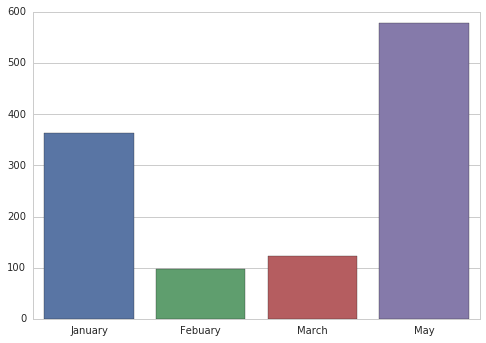

In [176]:
sns.barplot(x=mnName,y=sumeat);